In [1]:
from ca_particles import ParticleSimulation, CAModel, CASimulation
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:
def to_img(t):
    print(t[0].shape)
    return t[0].permute(1,2,0).numpy()

In [3]:
def make_p_sim(p_count):
    return ParticleSimulation(
        sim_count=16,
        wall_pad=2,
        env_size=24,
        particle_count=p_count,
        seed=117
    )

In [15]:
def make_ca_sim(path):
    ca_model = torch.load(path)
    return CASimulation(ca_model, torch.device('cuda'), 16, env_size=28, env_depth=16)

In [5]:
def run_sim(sim, draws, steps_per_draw, quantity):
    vals = []
    for d in range(draws):
        
        render = sim.draw()
        vals.append(quantity(render))
        for s in range(steps_per_draw):
            sim.sim_step(1.0)
    return vals

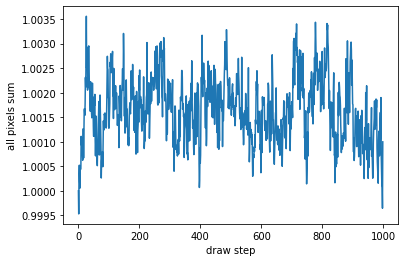

In [5]:
arr = np.array(run_sim(make_p_sim(6), 1000, 10, lambda x: x.sum().item()))
arr = arr/arr[0]
plt.plot(np.array(arr))
plt.ylabel('all pixels sum')
plt.xlabel('draw step')
plt.show()

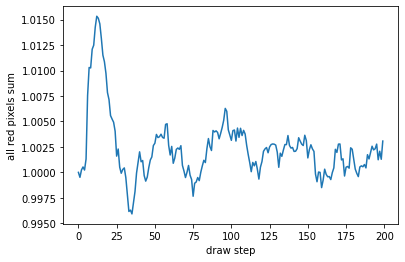

In [6]:
arr = np.array(run_sim(make_p_sim(6), 200, 10, lambda x: x[:,0].sum().item()))
arr = arr/arr[0]
plt.plot(np.array(arr))
plt.ylabel('all red pixels sum')
plt.xlabel('draw step')
plt.show()

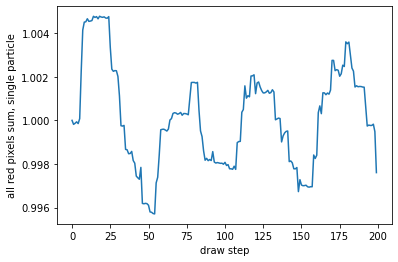

In [7]:
arr = np.array(run_sim(make_p_sim(1), 200, 10, lambda x: x[:,0].sum().item()))
arr = arr/arr[0]
plt.plot(np.array(arr))
plt.ylabel('all red pixels sum, single particle')
plt.xlabel('draw step')
plt.show()

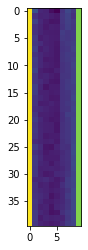

In [34]:
arr = np.array(run_sim(make_p_sim(6), 40, 10, lambda x: torch.histc(x, bins=10, min=0, max=1.0).numpy()))
hist_img = np.stack(arr, axis=0)
plt.imshow(np.log(hist_img))

<ipython-input-35-e44ff8243a69>:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(hist_img))


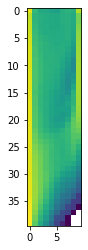

In [35]:
with torch.no_grad():
    ca_sim = make_ca_sim('checkpoints_512/ca_model_step_004096.pt')
    p_sim = make_p_sim(6)
    ca_sim.reset()
    ca_sim.states[:, 0:3, :, :] = p_sim.draw()
    arr = np.array(run_sim(ca_sim, 40, 10, lambda x: torch.histc(x, bins=10, min=0, max=1.0).cpu().numpy()))
hist_img = np.stack(arr, axis=0)
plt.imshow(np.log(hist_img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 28, 28])


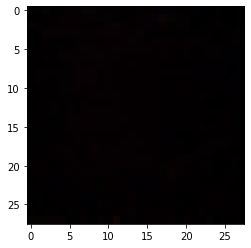

In [37]:
with torch.no_grad():
    ca_sim = make_ca_sim('checkpoints_512/ca_model_step_004096.pt')
    p_sim = make_p_sim(6)
    ca_sim.reset()
    ca_sim.states[:, 0:3, :, :] = p_sim.draw()
    for _ in range(500):
        ca_sim.sim_step(1.0)
    plt.imshow(to_img(ca_sim.draw().cpu()))